# 지도 학습

* 입력과 출력 샘플 데이터가 있고, 주어진 입력으로부터 출력을 예측하고자 할 때 사용
* 이전에 본 적 없는 새로운 데이터에 대해 정확한 출력을 예측

## 분류와 회귀
분류(classification), 회귀(regression)

### 분류(classification)는 미리 정의된, 가능성 있는 여러 클래스 레이블(class label) 중 하나를 예측하는 것
### 이진 분류(binary classification) : 두 개의 클래스로 분류 (예 / 아니오)
### 양성(posivite) : 주로 학습하고자 하는 대상, 음성(negative)
### 어떤 것을 양성이라 할지는 주관적

### 다중 분류(multiclass classification) : 셋 이상의 클래스로 분류

### 회귀(regression)은 연속적인 숫자 (부동소수점수, 실수)를 예측

### 출력 값에 연속성이 있다면 회귀 문제
어떤 사람이 1년에 40,000,000원 또는 40,000,001원을 예측해야 하는데 39,999,999원이나 40,000,001원을 예측했다고 하더라도 큰 문제가 되지 않는다.

## 일반화, 과대적합, 과소적합

### 일반화 : 모델이 처음 보는 데이터에 대해 정확하게 예측할 수 있을때 이를 훈련 세트에서 테스트 세트로 일반화(generalization)되었다고 한다

### 과대적합 : 가진 정보를 모두 사용해서 복잡한 모델을 만드는 것, 모델이 훈련 세트의 각 샘플에 너무 가깝게 맞춰져서 새로운 데이터에 일반화되기 어려울 때

### 과소적합 : 너무 간단한 모델이 선택되는 것

#### 모델을 복잡하게 할수록 훈련 데이터에 대해서는 더 정확히 예측할 수 있지만 너무 복잡해지면 훈련 세트의 각 데잉터 포인트에 너무 민감해져 새로운 데이터에 잘 일반화되지 못한다.

### 모델 복잡도와 데이터셋 사이즈의 관계

#### 모델의 복잡도는 훈련 데이터셋에 담긴 입력 데이터의 다양성과 관련이 깊다
#### 데이터 포인트가 많을수록 다양성을 키워줌 -> 큰 데이터셋은 더 복잡한 모델을 만들 수 있게 해줌(같은 데이터 중복 X, 비슷한 데이터 모으기 X)

#### 실제 환경에서는 데이터를 얼마나 많이 모을지 정해야함

## 지도 학습 알고리즘



In [1]:
%matplotlib inline
from preamble import *
# preamble.py 파일을 쥬피터 같은 경로에 넣든지 anaconda에 넣든지

X.shape: (26, 2)


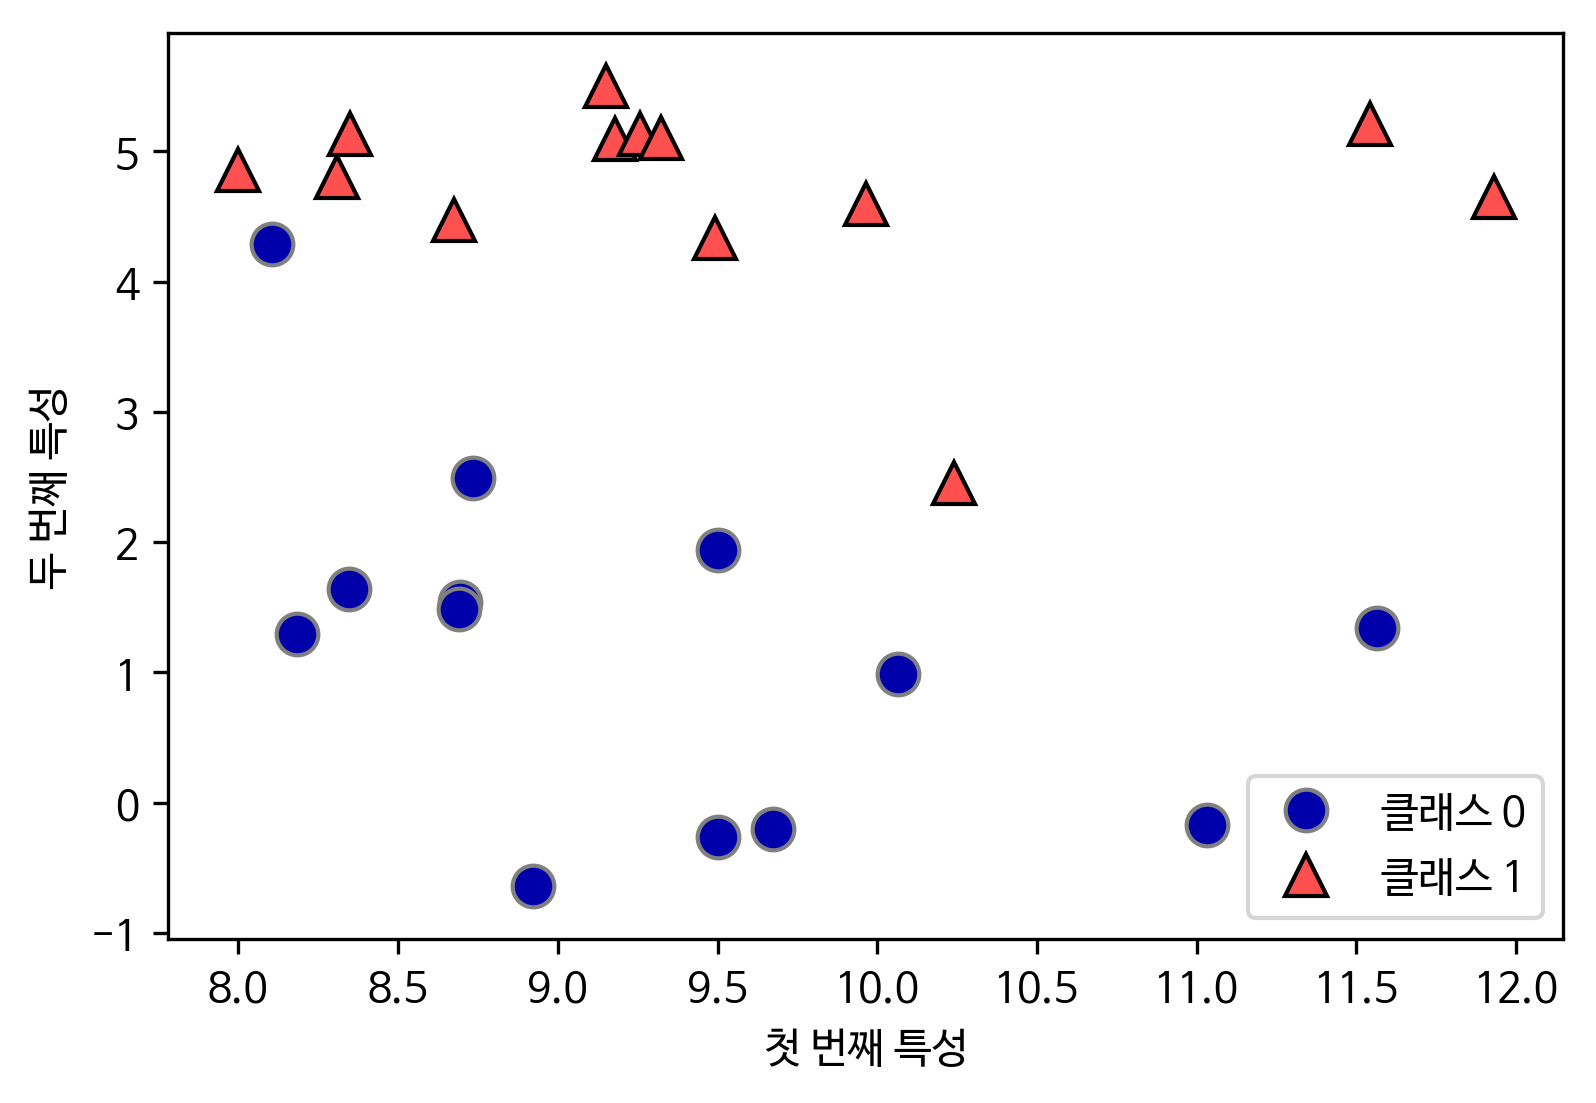

In [2]:
# # 그래프를 노트북 안에 그리기 위해 설정
# %matplotlib inline

# # 필요한 패키지와 라이브러리를 가져옴
# import matplotlib as mpl
# import matplotlib.pyplot as plt
# import matplotlib.font_manager as fm

# # 그래프에서 마이너스 폰트 깨지는 문제에 대한 대처
# mpl.rcParams['axes.unicode_minus'] = False
# # matplotlib.rcParams[] : 전역 글꼴 설정
# # https://matplotlib.org/users/customizing.html
# # 나눔명조로 글꼴 바꾸기(전역)
# plt.rcParams["font.family"] = 'nanummyeongjo'

import sys
import pandas as pd
import matplotlib
import numpy as np
import scipy as sp
import IPython
import sklearn
import mglearn

plt.rcParams['figure.dpi'] = 300
# 데이터셋을 만듭니다.
X, y = mglearn.datasets.make_forge()
# 산점도를 그립니다.
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.legend(["클래스 0", "클래스 1"], loc=4)
plt.xlabel("첫 번째 특성")
plt.ylabel("두 번째 특성")
print("X.shape: {}".format(X.shape))
# 데이터 포인트 26개와 특성 2개

Text(0,0.5,'타깃')

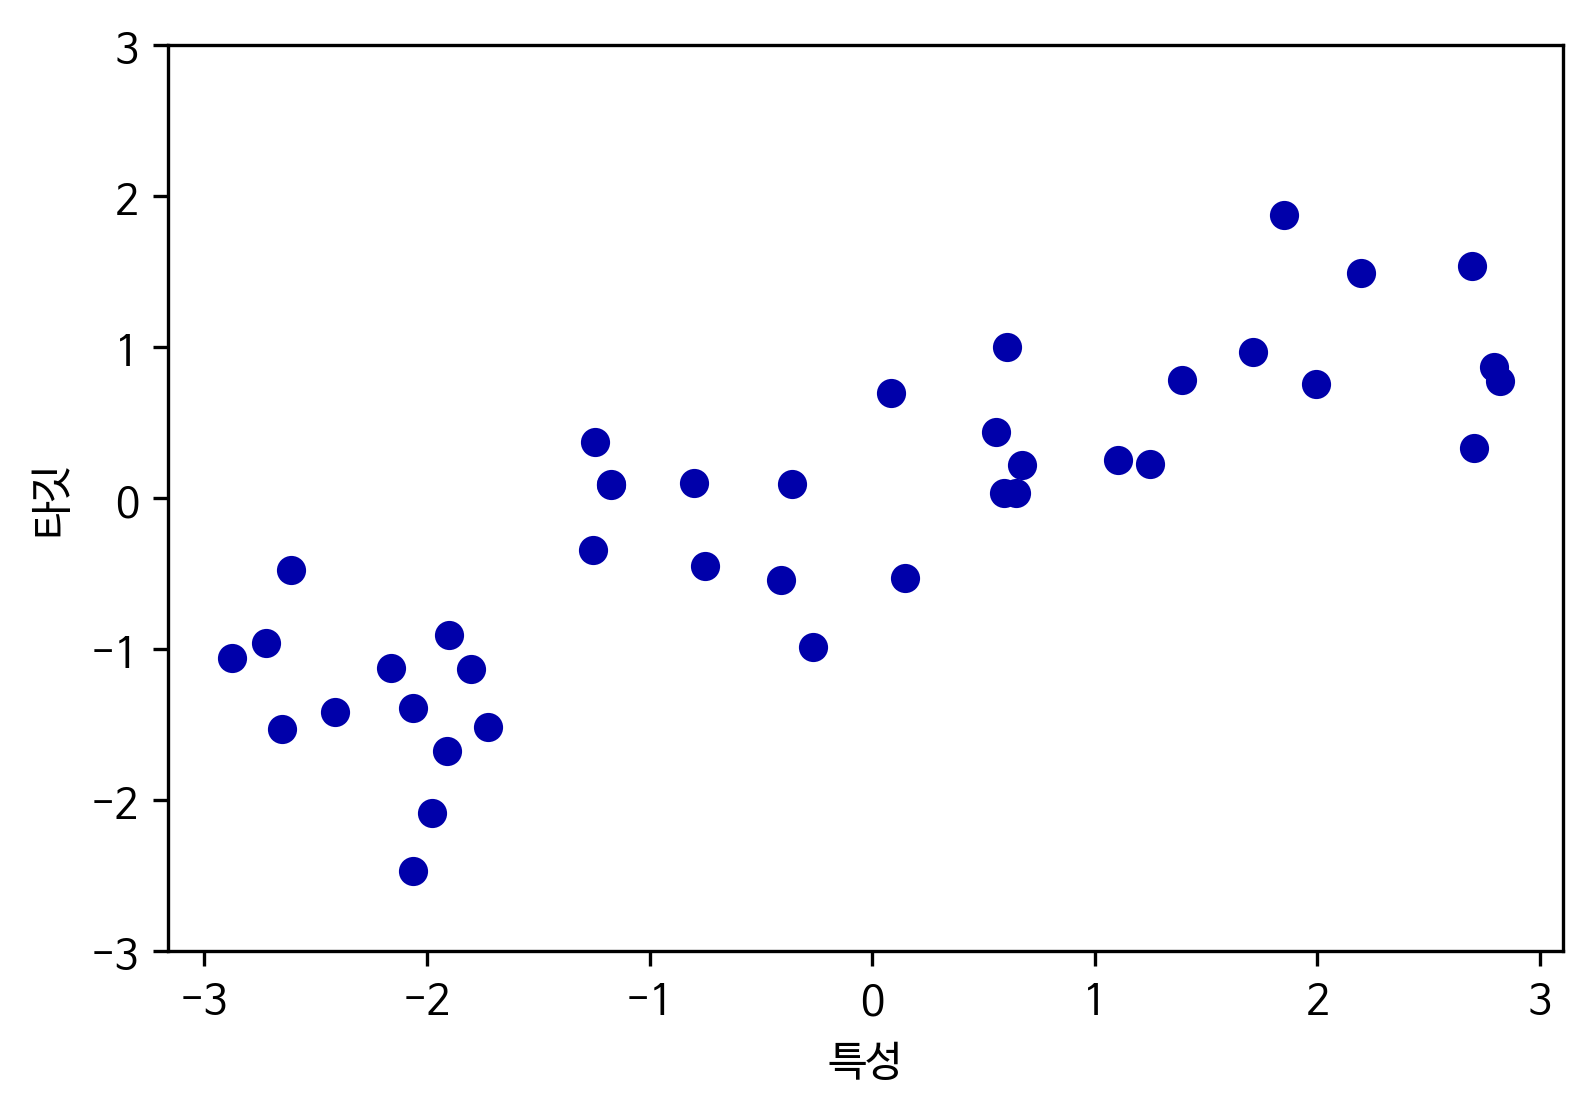

In [3]:
X, y = mglearn.datasets.make_wave(n_samples=40)
plt.plot(X, y, 'o')
plt.ylim(-3, 3)
plt.xlabel("특성")
plt.ylabel("타깃")

In [4]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
print("cancer.keys(): \n{}".format(cancer.keys()))

cancer.keys(): 
dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names'])


In [5]:
print("유방암 데이터의 형태: {}".format(cancer.data.shape))
# 569개의 데이터 포인트를 가지고 있고 특성은 30개입니다.

유방암 데이터의 형태: (569, 30)


In [6]:
print("클래스별 샘플 개수:\n{}".format(
{n: v for n, v in zip(cancer.target_names, np.bincount(cancer.target))}))

클래스별 샘플 개수:
{'malignant': 212, 'benign': 357}


In [7]:
#feature_names 속성을 확인하면 각 특성의 의미를 알 수 있습니다.
print("특성 이름:\n{}".format(cancer.feature_names))
#데이터에 관한 더 자세한 정보는 cancer.DESCR에서 확인

특성 이름:
['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


In [8]:
from sklearn.datasets import load_boston
boston = load_boston()
print("데이터의 형태: {}".format(boston.data.shape))
print("데이터의 형태: {}".format(boston.DESCR))
# 입력 특성뿐 아니라 특성끼리 곱하여(또는 상호작용) 의도적으로 확장됨
# 범죄율과 고속도로 접근성의 개별 특성은 물론, 범죄율과 고속도로 접근성의 곱도 특성으로 생각한다
# 특성을 유도해내는 것 : 특성 공학(feature engineering)

데이터의 형태: (506, 13)
데이터의 형태: Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-

In [9]:
X, y = mglearn.datasets.load_extended_boston()
print("X.shape: {}".format(X.shape))
#extended version이 유도된 데이터셋

X.shape: (506, 104)


# K-최근접 이웃
## 가장 간단한 머신러닝 알고리즘
## 훈련 데이터셋을 그냥 저장하는 것이 모델을 만드는 과정의 전부
## 새로운 데이터 포인트에 대해 예측할 땐 알고리즘이 훈련 데이터셋에서 가장 가까운 데이터 포인트, 즉 '최근접 이웃'을 찾는다

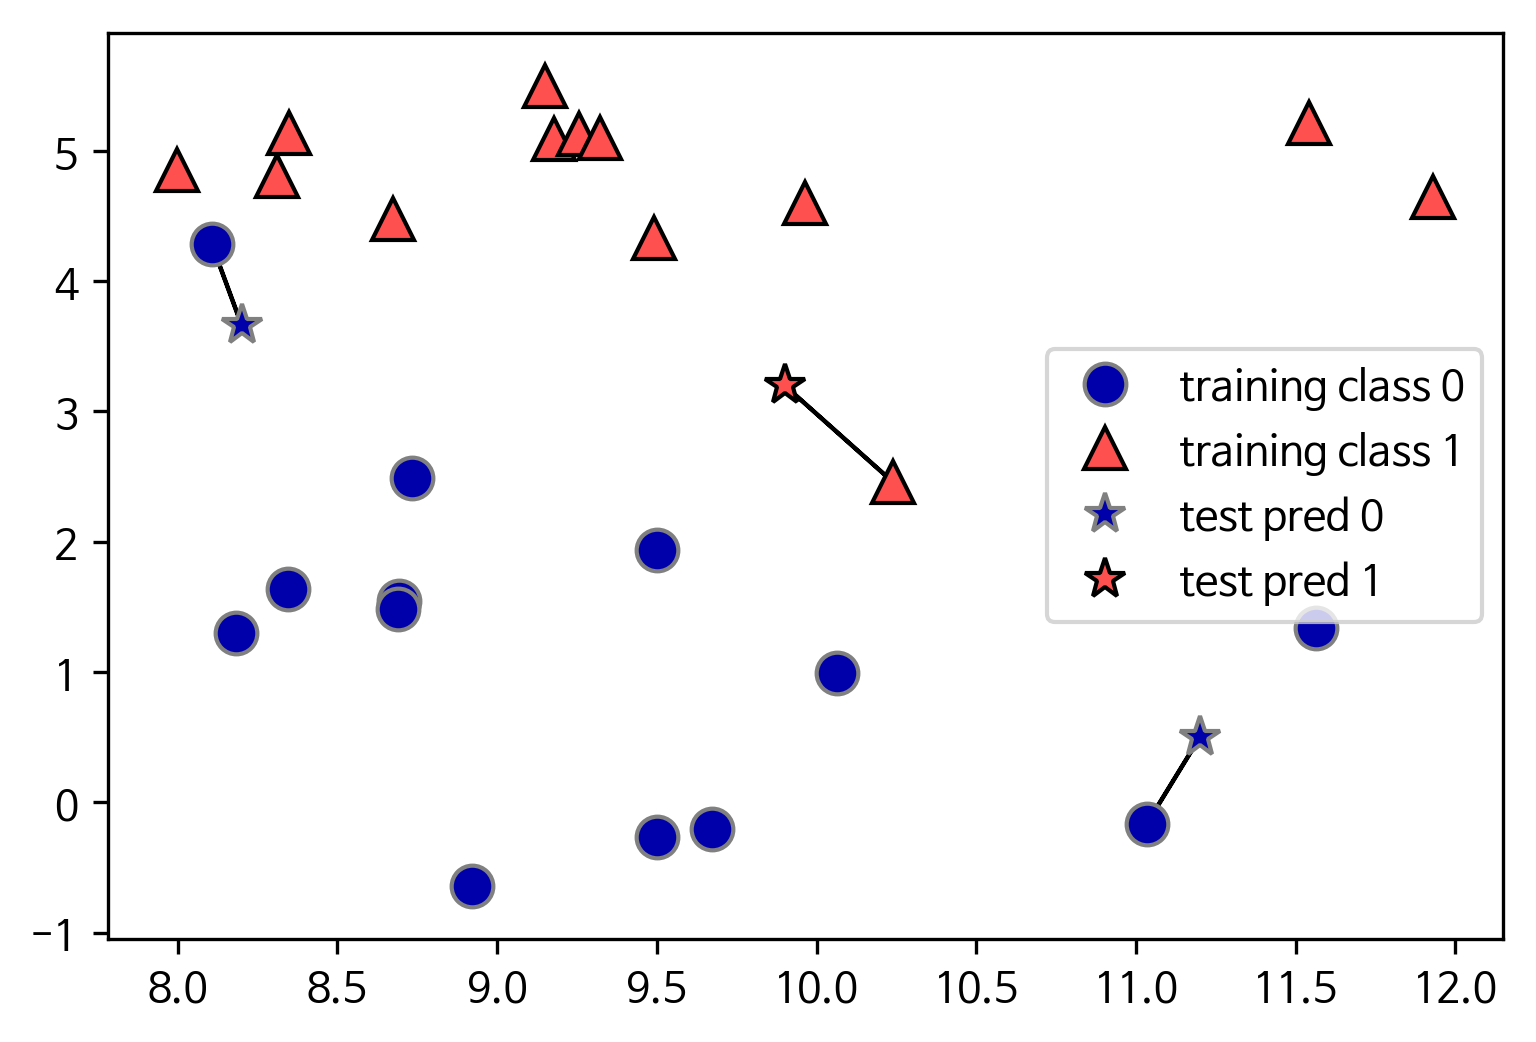

In [10]:
mglearn.plots.plot_knn_classification(n_neighbors=1)
# 별 모양 데이터 3개를 추가하고 가장 가까운 훈련 데이터 포인트를 연결(데이터 포인트의 레이블)
# 가장 가까운 이웃 하나가 아니라 임의의 k개를 선택할 수도 있다
# 둘 이상의 이웃을 선택할 때는 레이블을 정하기 위해 투표
# -> 테스트 포인트 하나에 대해 k-최근접 이웃 중 다수의 클래스가 레이블이 됨


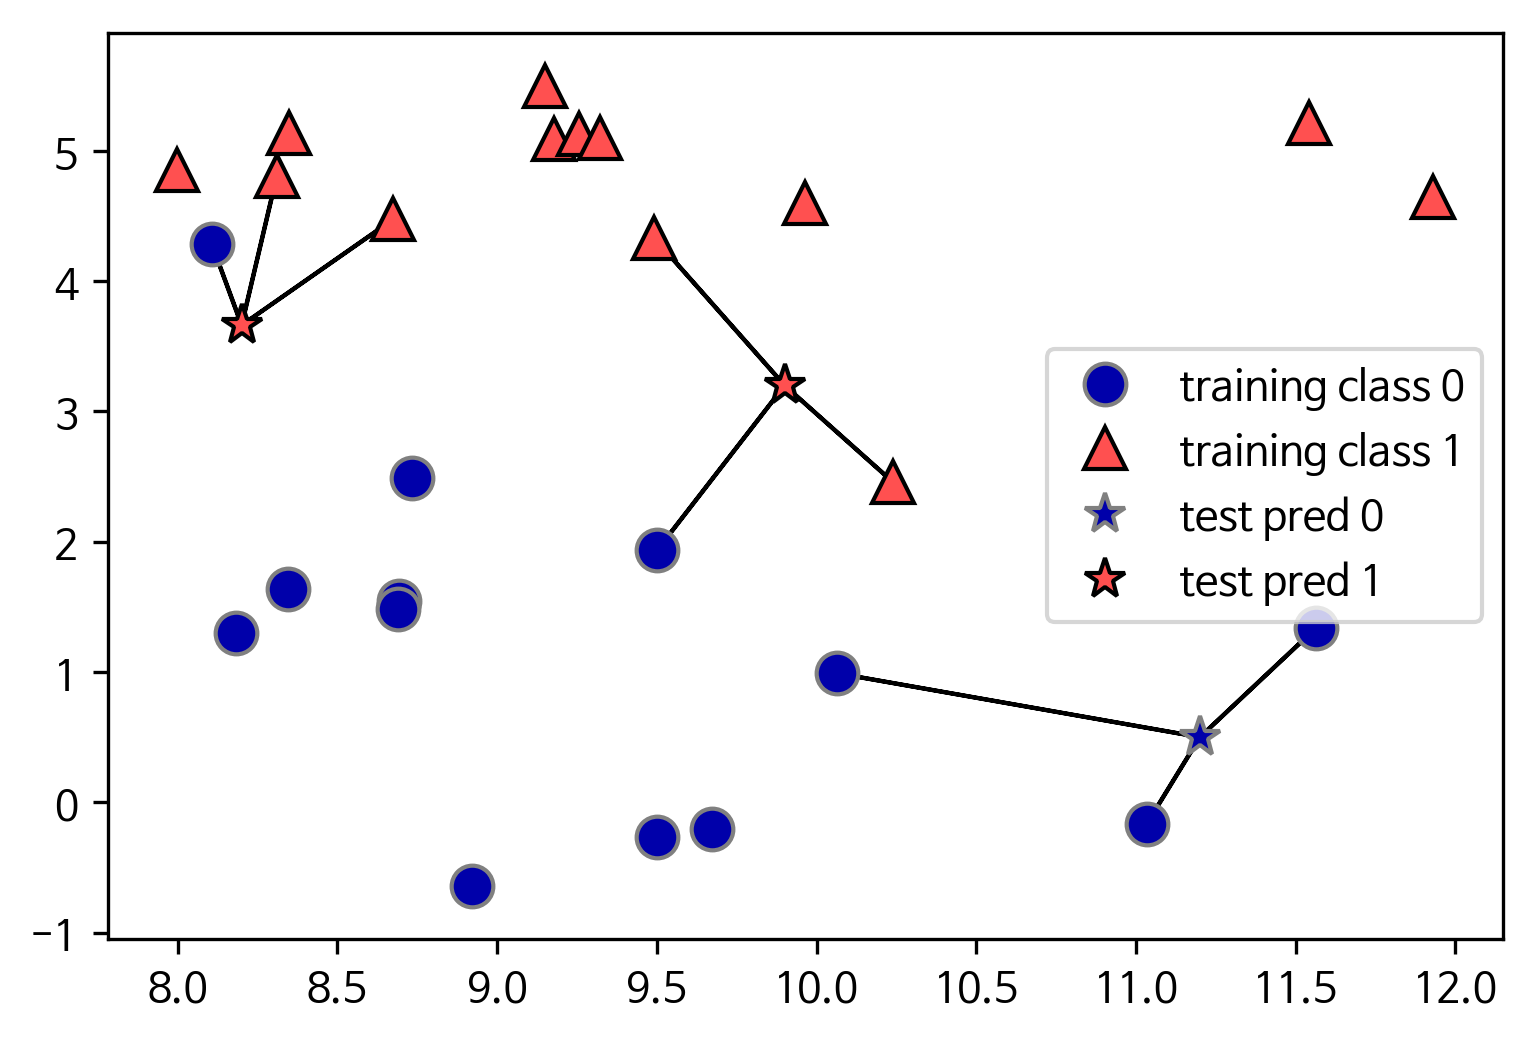

In [11]:
mglearn.plots.plot_knn_classification(n_neighbors=3)

In [12]:
from sklearn.model_selection import train_test_split
X, y = mglearn.datasets.make_forge()

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [13]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=3)

In [14]:
clf.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform')

In [15]:
print("테스트 세트 예측: {}".format(clf.predict(X_test)))
# predict 메서드로 예측, 가장 가까운 이웃 계산 후 가장 많은 클래스 찾음

테스트 세트 예측: [1 0 1 0 1 0 0]


In [16]:
print("테스트 세트 정확도: {:.2f}".format(clf.score(X_test, y_test)))
# score 메서드에 테스트 데이터와 테스트 레이블을 넣어 모델이 얼마나 잘 일반화되었는지 평가

테스트 세트 정확도: 0.86


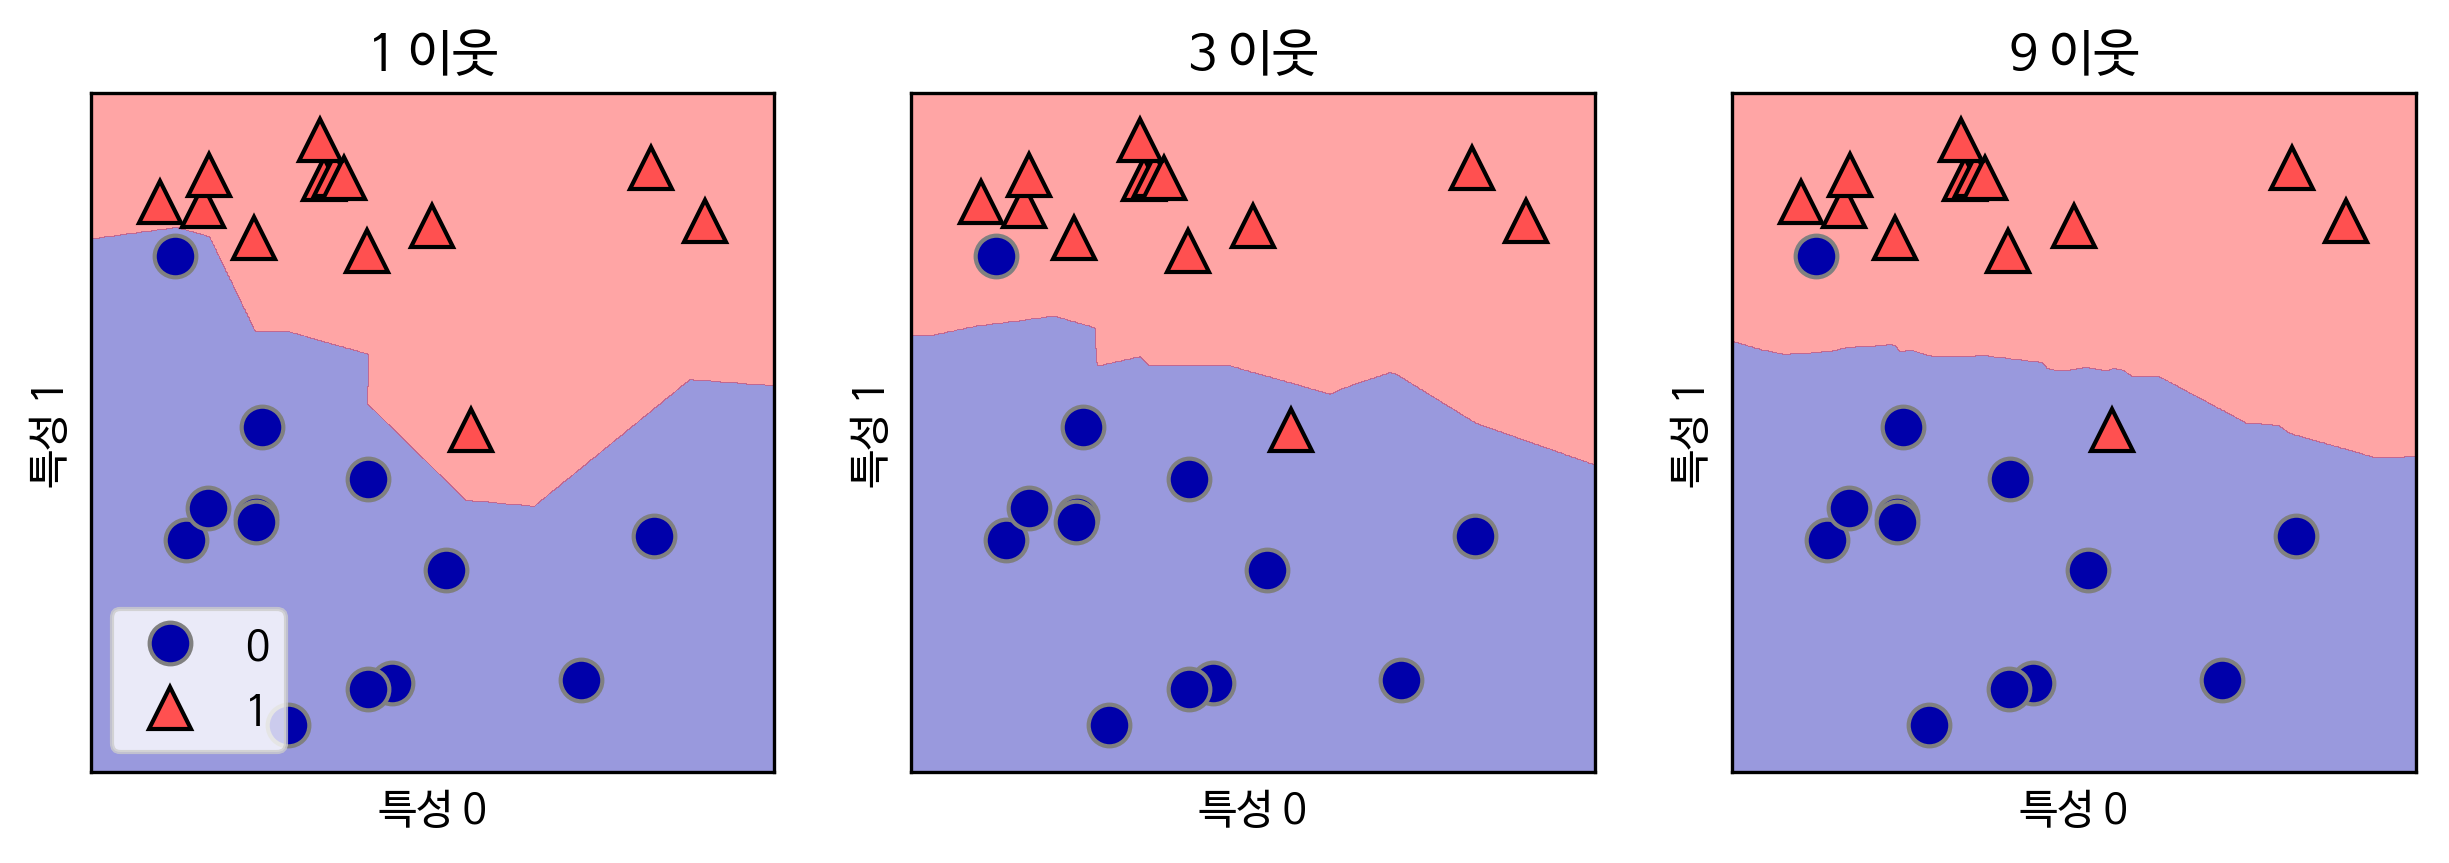

In [17]:
# KNeighborsClassifier 분석
# 클래스 0과 클래스 1로 지정한 영역으로 나뉘는 결정 경계(decision boundary)
fig, axes = plt.subplots(1, 3, figsize=(10, 3))

for n_neighbors, ax in zip([1, 3, 9], axes):
    #fit 메서드는 self 객체를 반환합니다.
    #그래서 객체 생성과 fit 메서드를 한 줄에 쓸 수 있습니다.
    clf = KNeighborsClassifier(n_neighbors=n_neighbors).fit(X,y)
    mglearn.plots.plot_2d_separator(clf,X, fill=True, eps=0.5, ax=ax, alpha=.4)
    mglearn.discrete_scatter(X[:,0], X[:,1], y, ax=ax)
    ax.set_title("{} 이웃".format(n_neighbors))
    ax.set_xlabel("특성 0")
    ax.set_ylabel("특성 1")
    axes[0].legend(loc=3)

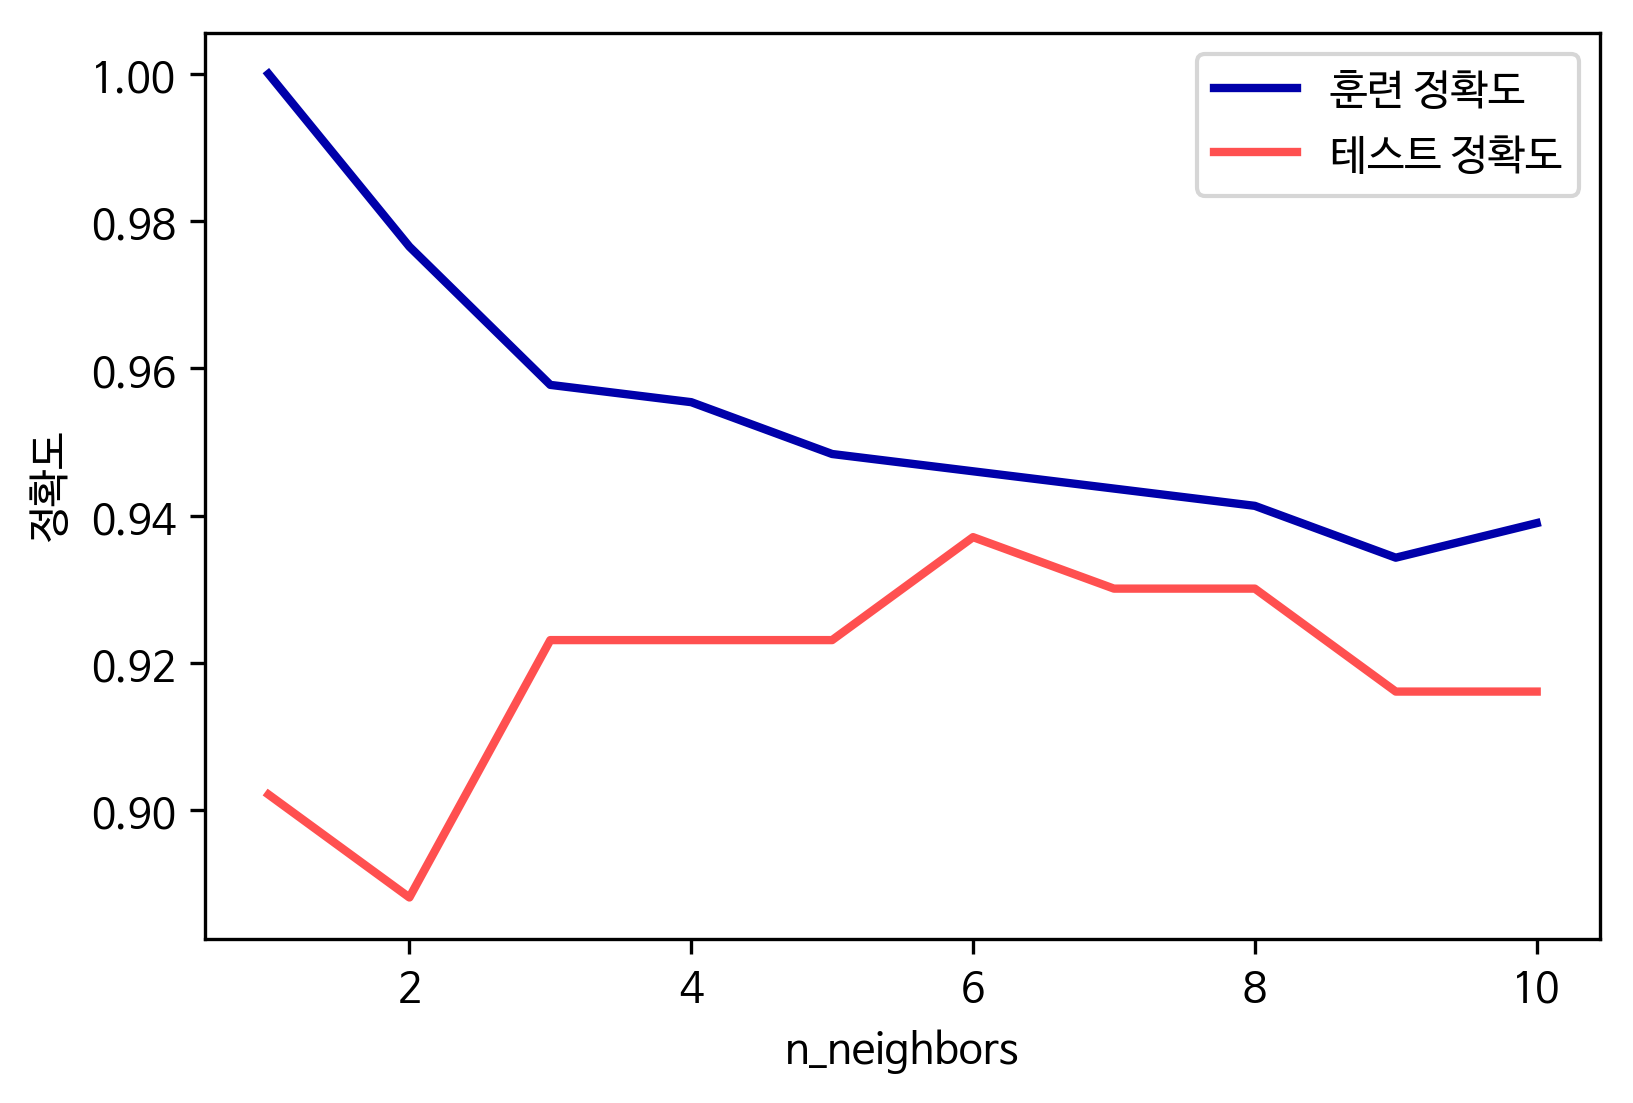

In [18]:
# 이웃의 수를 늘릴수록 결정 경계는 더 부드러워진다 -> 단순한 모델
# 이웃 적게 사용 -> 모델의 복잡도 높아짐. 이웃 많이 사용 -> 복잡도 낮아짐.

from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, stratify=cancer.target, random_state=66)

training_accuracy = []
test_accuracy = []
# 1에서 10까지 n_neighbors를 적용
neighbors_settings = range(1,11)
for n_neighbors in neighbors_settings:
    # 모델 생성
    clf = KNeighborsClassifier(n_neighbors=n_neighbors)
    clf.fit(X_train, y_train)
    # 훈련 세트 정확도 저장
    training_accuracy.append(clf.score(X_train, y_train))
    # 일반화 정확도 저장
    test_accuracy.append(clf.score(X_test, y_test))
    
plt.plot(neighbors_settings, training_accuracy, label="훈련 정확도")
plt.plot(neighbors_settings, test_accuracy, label="테스트 정확도")
plt.ylabel("정확도")
plt.xlabel("n_neighbors")
plt.legend()

최근접 이웃의 수가 하나일 때 : 훈련 데이터에 대한 예측이 완벽
이웃의 수가 늘어나면 : 모델은 단순해짐, 훈련 데이터의 정확도 줄어듬
이웃 하나 사용 테스트 세트 정확도는 많이 사용했을 때보다 낮음 -> 1-최근접 이웃이 모델을 너무 복잡하게 만든다.
이웃 10개 사용 : 모델이 너무 단순해서 정확도는 더 나빠짐.